## Importing required Libraries

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [5]:
train_data = pd.read_csv("train_data.csv")
valid_data = pd.read_csv("valid_data.csv")

In [6]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [7]:
print(valid_data.shape)
valid_data.head(10)

(229, 2)


,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212
5,2014-02-14,236
6,2014-02-15,134
7,2014-02-16,117
8,2014-02-17,239
9,2014-02-18,232


# Required Preprocessing 

In [9]:
train_data["Date"] = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')


In [10]:
valid_data["Date"] = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')


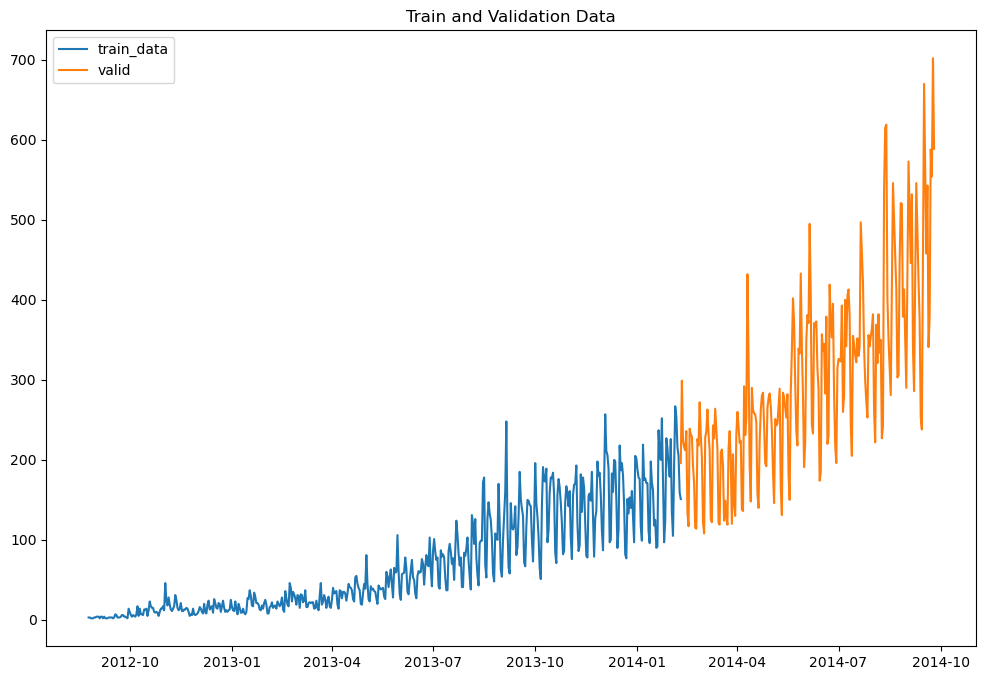

In [11]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

In [12]:
train_data.Date.min(), train_data.Date.max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-02-09 00:00:00'))

In [13]:
valid_data.Date.min(), valid_data.Date.max()

(Timestamp('2014-02-09 00:00:00'), Timestamp('2014-09-25 00:00:00'))

# Naive Model
Use the last (most recent) value of train as the predictions


<img src="naive formula.png" width=160 height=100 />

In [14]:
print(train_data.shape)
train_data.tail()

(534, 2)


,Date,count
529,2014-02-05,254
530,2014-02-06,216
531,2014-02-07,205
532,2014-02-08,159
533,2014-02-09,151


In [16]:
# indexing starts from 0
train_data['count'][533]

151

In [17]:
# Defining predictions for validation
valid_data['naive'] = train_data['count'][533]

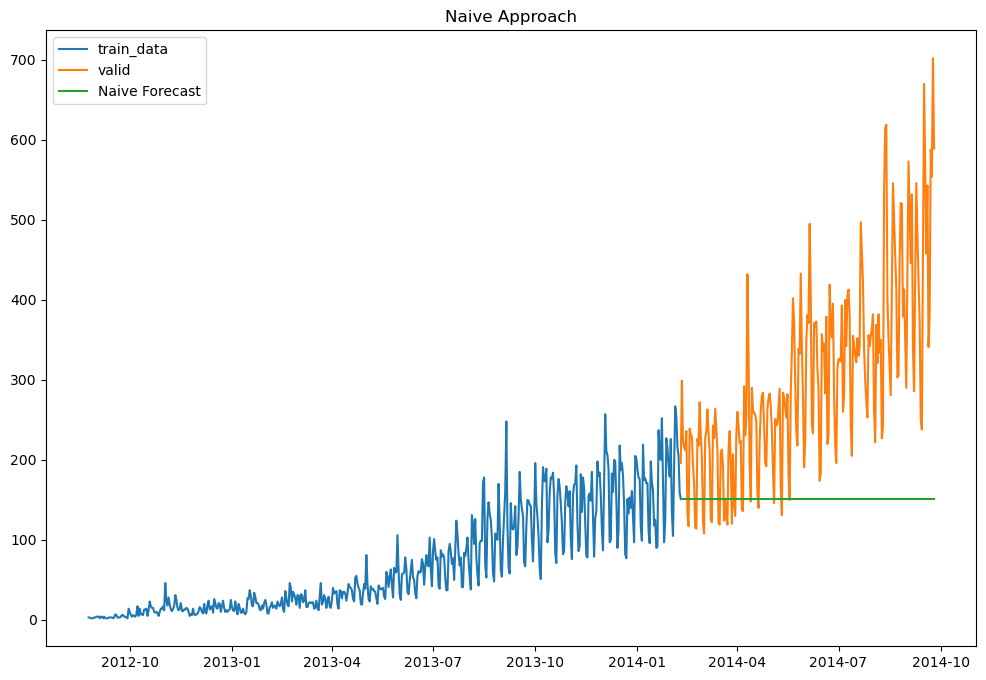

In [18]:
plt.figure(figsize=(12,8))

plt.plot(train_data["Date"], train_data['count'], label='train_data')
plt.plot(valid_data["Date"],valid_data['count'], label='valid')
plt.plot(valid_data["Date"],valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [19]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 191.31604662004477
